In [4]:
import pandas as pd
import requests
import pprint
from config import api_key
import matplotlib.pyplot as plt

In [5]:
us_file = pd.read_csv("Video_CSVs/USvideos.csv")
us_file.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [6]:
# see if there is any missing data
us_file.count()

video_id                  40949
trending_date             40949
title                     40949
channel_title             40949
category_id               40949
publish_time              40949
tags                      40949
views                     40949
likes                     40949
dislikes                  40949
comment_count             40949
thumbnail_link            40949
comments_disabled         40949
ratings_disabled          40949
video_error_or_removed    40949
description               40379
dtype: int64

In [7]:
# get api data to add category names
params = {"part":"snippet","regionCode":"US",
           "key":api_key}
base_url= "https://www.googleapis.com/youtube/v3/videoCategories"
response = requests.get(base_url, params=params).json()
response

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"ksCrgYQhtFrXgbHAhi9Fo5t0C2I/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"ksCrgYQhtFrXgbHAhi9Fo5t0C2I/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ksCrgYQhtFrXgbHAhi9Fo5t0C2I/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ksCrgYQhtFrXgbHAhi9Fo5t0C2I/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ksCrgYQhtFrXgbHAhi9Fo5t0C2I/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [8]:
id_list = []
title_list = []
for i in response['items']:
    #print(i)
    id_list.append(i['id'])
    title_list.append(i['snippet']['title'])

In [9]:
# Create DF
category_df=pd.DataFrame({"category_id":id_list,"title_list":title_list})
category_df["category_id"]=category_df["category_id"].astype("int64")
category_df.dtypes

category_id     int64
title_list     object
dtype: object

In [10]:
# Merge with us_df
us_df=pd.merge(us_file,category_df,on='category_id',how="left")
us_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_list
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,Pets & Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,People & Blogs
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,Entertainment
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,Film & Animation


In [11]:
# focus on data that we are interested in
us_df=us_df.loc[:,("trending_date", "title", "channel_title", "title_list", "views", "likes", "dislikes")]
us_df

,trending_date,title,channel_title,title_list,views,likes,dislikes
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,748374,57527,2966
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2418783,97185,6146
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,3191434,146033,5339
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,343168,10172,666
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2095731,132235,1989
...,...,...,...,...,...,...,...
40944,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,Pets & Animals,1685609,38160,1385
40945,18.14.06,True Facts : Ant Mutualism,zefrank1,People & Blogs,1064798,60008,382
40946,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,Entertainment,1066451,48068,1032
40947,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,Film & Animation,5660813,192957,2846


In [12]:
# rename columns
us_df=us_df.rename(columns={"video_id":"Video ID", 
                            "trending_date": "Trending Date",
                            'title': "Title",
                            "channel_title":"Channel Title",
                            'title_list': "Category ID",
                            'views':'Views', 
                            "likes": 'Likes', 
                            'dislikes': "Dislikes",
                            'comment_count': 'Comment Count'})
us_df

,Trending Date,Title,Channel Title,Category ID,Views,Likes,Dislikes
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,748374,57527,2966
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2418783,97185,6146
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,3191434,146033,5339
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,343168,10172,666
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2095731,132235,1989
...,...,...,...,...,...,...,...
40944,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,Pets & Animals,1685609,38160,1385
40945,18.14.06,True Facts : Ant Mutualism,zefrank1,People & Blogs,1064798,60008,382
40946,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,Entertainment,1066451,48068,1032
40947,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,Film & Animation,5660813,192957,2846


# US Videos Analysis

In [13]:
#sorted views in descending order (largest values at the top)
videoviews_us=us_df.groupby("Title").max()["Views"]
top_views_us=videoviews_us.sort_values("Views",ascending=False)
top_views_us

ValueError: No axis named Views for object type <class 'pandas.core.series.Series'>

In [ ]:
#sorted views in descending order (largest values at the top)
top_views_us=us_df.sort_values("Views",ascending=False)
#top 5 video views
top_5_views_us = top_views_us.groupby("Title").sum()["Views"]
top_5_views_us = top_5_views_us.head(5)
top_5_views_us

In [ ]:
# create bar plot showing the top five viewed videos in the US
plt.bar(top_5_views_us["Title"],top_5_views_us["Views"], color="green")
plt.xticks(top_5_views_us["Title"], rotation='vertical')
plt.ylabel("Total Views")
plt.xlabel("Top Viewed Videos")
plt.title("Total Views of the Top Five Viewed US Videos")

In [ ]:
#sorted views in ascending order (lowest values at the top)
bottom_views_us=us_df.sort_values("Views")
#bottom 5 video views
bottom_5_views_us = bottom_views_us[:5]
bottom_5_views_us

In [ ]:
# create bar plot showing the bottom five viewed videos in the US
plt.bar(bottom_5_views_us["Title"],bottom_5_views_us["Views"], color="red")
plt.xticks(bottom_5_views_us["Title"], rotation='vertical')
plt.ylabel("Total Views")
plt.xlabel("Bottom Viewed Videos")
plt.title("Total Views of the Bottom Five Viewed US Videos")
#"1 dead, others injured after Ky. school shooting" has the bottom three viewed slots

In [ ]:
#sort likes in descending order (largest values at the top)
top_likes_us=us_df.sort_values("Likes",ascending=False)
#top 5 video views
top_5_likes_us = top_likes_us[:5]
top_5_likes_us

In [ ]:
# create bar plot showing the top five viewed videos in the US
plt.bar(top_5_likes_us["Title"],top_5_likes_us["Likes"], color="lightgreen")
plt.xticks(top_5_likes_us["Title"], rotation='vertical')
plt.ylabel("Total Likes")
plt.xlabel("Top Liked Videos")
plt.title("Total Likes of the Top Five Liked US Videos")
# all the same videos

In [ ]:
#sort likes in ascending order (lowest values at the top)
top_dislikes_us=us_df.sort_values("Dislikes", ascending=False)
#bottom 5 video views
top_dislikes_us = bottom_likes_us[:5]
top_dislikes_us

In [ ]:
# create bar plot showing the top five viewed videos in the US
plt.bar(top_dislikes_us["Title"],bottom_5_likes_us["Dislikes"], color="pink")
plt.xticks(top_dislikes_us["Title"], rotation='vertical')
plt.ylabel("Total Dislikes")
plt.xlabel("Top Disliked Videos")
plt.title("Total Dislikes of the Top Five Disliked US Videos")

# US Channels Analysis

In [ ]:
# Find top viewed Channels
channel_data_us = us_df.loc[:,("Channel Title", "Views", "Likes", "Dislikes")]
channel_data_us

In [ ]:
# sum the views, likes, and dislikes for each channel
topviewedchannel_us = channel_data_us.groupby("Channel Title").sum()["Views"]
toplikedchannel_us = channel_data_us.groupby("Channel Title").sum()["Likes"]
topdislikedchannel_us = channel_data_us.groupby("Channel Title").sum()["Dislikes"]

# create a dataframe of the total views, likes, and dislilkes of each channel
channel_summary_us = pd.DataFrame({"Total Views":topviewedchannel_us,
                               "Total Likes":toplikedchannel_us,
                               "Total Dislikes":topdislikedchannel_us})

# print dataframe
channel_summary_us

In [ ]:
#sort channel views in descending order (largest values at the top)
topchannelviews_us = channel_summary_us.sort_values("Total Views", ascending=False)
#top 5 viewed channels
top_5_viewedchannels_us = topchannelviews_us[:5]
top_5_viewedchannels_us

In [ ]:
#sort channel views in ascending order (lowest values at the top)
lowchannelviews_us = channel_summary_us.sort_values("Total Views")
#bottom 5 viewed channels
bottom_5_viewedchannels_us = lowchannelviews_us[:5]
bottom_5_viewedchannels_us

In [ ]:
#sort channel likes in descending order (largest values at the top)
topchannellikes_us = channel_summary_us.sort_values("Total Likes", ascending=False)
#top 5 liked channels
top_5_likedchannels_us = topchannellikes_us[:5]
top_5_likedchannels_us

In [ ]:
#sort channel dislikes in descending order (largest values at the top)
topchanneldislikes_us = channel_summary_us.sort_values("Total Dislikes", ascending=False)
#top 5 disliked channels
top_5_dislikedchannels_us = topchanneldislikes_us[:5]
top_5_dislikedchannels_us

# US Categories Analysis

In [14]:
#Findiing the Sum of Likes 
Likes_Category_US=us_df.groupby('Category ID').sum()["Likes"]
Likes_Category_US_df=pd.DataFrame(Likes_Category_US)
Likes_Category_US_df=Likes_Category_US_df.reset_index()
Likes_Category_US_df = Likes_Category_US_df.sort_values("Likes", ascending=False)
Likes_Category_US_df

,Category ID,Likes
7,Music,1416838584
3,Entertainment,530516491
1,Comedy,216346746
10,People & Blogs,186615999
4,Film & Animation,165997476
6,Howto & Style,162880075
14,Sports,98621211
12,Science & Technology,82532638
5,Gaming,69038284
2,Education,49257772


Text(0.5, 1.0, 'Total Video Likes of Each Youtube Category')

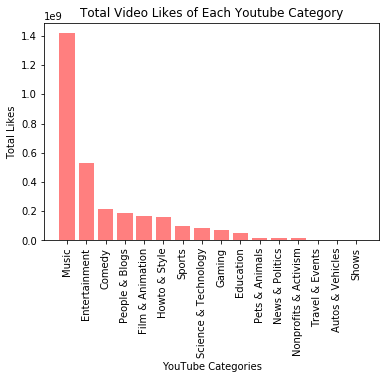

In [15]:
# create labels
catlikes_labels_us = Likes_Category_US_df["Category ID"]

# create bar plot that shows all views, likes, dislikes for each category
plt.bar(catlikes_labels_us,Likes_Category_US_df["Likes"], color="r",alpha=0.5,align="center")
plt.xticks(catlikes_labels_us, rotation='vertical')
plt.ylabel("Total Likes")
plt.xlabel("YouTube Categories")
plt.title("Total Video Likes of Each Youtube Category")

In [16]:
#Finding the Sum of Dislikes 
Dislikes_Category_US=us_df.groupby('Category ID').sum()["Dislikes"]
Dislikes_Category_US_df=pd.DataFrame(Dislikes_Category_US)
Dislikes_Category_US_df=Dislikes_Category_US_df.reset_index()
Dislikes_Category_US_df=Dislikes_Category_US_df.sort_values("Dislikes",ascending=False)
Dislikes_Category_US_df

,Category ID,Dislikes
7,Music,51179008
3,Entertainment,42987663
10,People & Blogs,10187901
5,Gaming,9184466
1,Comedy,7230391
4,Film & Animation,6075148
6,Howto & Style,5473899
14,Sports,5133551
12,Science & Technology,4548402
8,News & Politics,4180049


Text(0.5, 1.0, 'Total Video Dislikes of Each Youtube Category')

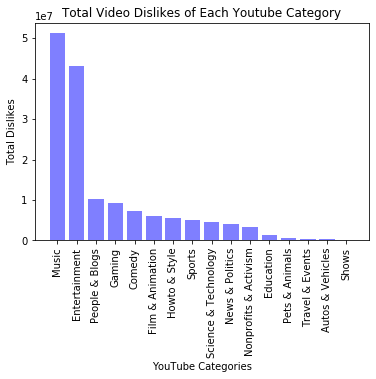

In [17]:
# create labels
catdislikes_labels_us = Dislikes_Category_US_df["Category ID"]

# create bar plot that shows all views, likes, dislikes for each category
plt.bar(catdislikes_labels_us,Dislikes_Category_US_df["Dislikes"], color="b",alpha=0.5,align="center")
plt.xticks(catdislikes_labels_us, rotation='vertical')
plt.ylabel("Total Dislikes")
plt.xlabel("YouTube Categories")
plt.title("Total Video Dislikes of Each Youtube Category")

In [18]:
#Finding the Sum of Views 
Views_Category_US=us_df.groupby('Category ID').sum()["Views"]
Views_Category_US_df=pd.DataFrame(Views_Category_US)
Views_Category_US_df=Views_Category_US_df.reset_index()
Views_Category_US_df=Views_Category_US_df.sort_values("Views", ascending=False)
Views_Category_US_df

,Category ID,Views
7,Music,40132892190
3,Entertainment,20604388195
4,Film & Animation,7284156721
1,Comedy,5117426208
10,People & Blogs,4917191726
14,Sports,4404456673
6,Howto & Style,4078545064
12,Science & Technology,3487756816
5,Gaming,2141218625
8,News & Politics,1473765704


Text(0.5, 1.0, 'Total Video Views of Each Youtube Category')

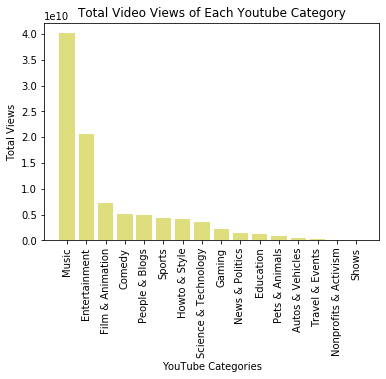

In [19]:
# create labels
catviews_labels_us = Views_Category_US_df["Category ID"]

# create bar plot that shows all views, likes, dislikes for each category
plt.bar(catviews_labels_us,Views_Category_US_df["Views"], color="y",alpha=0.5,align="center")
plt.xticks(catviews_labels_us, rotation='vertical')
plt.ylabel("Total Views")
plt.xlabel("YouTube Categories")
plt.title("Total Video Views of Each Youtube Category")

In [20]:
Top_5_CategoryID_Views_US=Views_Category_US_df.sort_values("Views", ascending=False)
Top5Viewed_US=Top_5_CategoryID_Views_US.head(5)
Top5Viewed_US

,Category ID,Views
7,Music,40132892190
3,Entertainment,20604388195
4,Film & Animation,7284156721
1,Comedy,5117426208
10,People & Blogs,4917191726


Text(0.5, 1.0, 'Top 5 Viewed YouTube Categories')

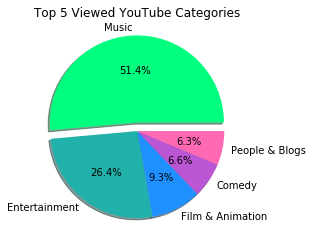

In [21]:
# create pie plot for the top viewed categories in YouTube
# Tells matplotlib to seperate the "Music" (#1 category) section from the others
explode = (0.1, 0, 0, 0, 0)
colors = ["springgreen", "lightseagreen", "dodgerblue", "mediumorchid", "hotpink"]
plt.pie(Top5Viewed_US["Views"], explode=explode, labels=Top5Viewed_US["Category ID"], colors = colors, autopct="%1.1f%%", shadow=True)
plt.title("Top 5 Viewed YouTube Categories")

In [22]:
Bottom_5_CategoryID_Views_US=Views_Category_US_df.sort_values("Views", ascending=True)
Bottom5Viewed_US=Bottom_5_CategoryID_Views_US.head(5)
Bottom5Viewed_US

,Category ID,Views
13,Shows,51501058
9,Nonprofits & Activism,168941392
15,Travel & Events,343557084
0,Autos & Vehicles,520690717
11,Pets & Animals,764651989


Text(0.5, 1.0, 'Top 5 Viewed YouTube Categories')

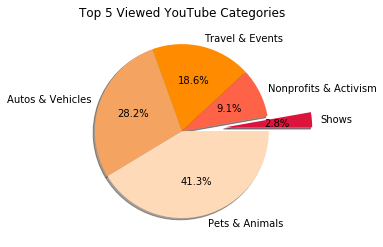

In [23]:
# create pie plot for the least viewed categories in YouTube
# Tells matplotlib to seperate the "Shows" (least viewed) section from the others
explode = (0.5, 0, 0, 0, 0)
colors = ["crimson", "tomato", "darkorange", "sandybrown", "peachpuff"]
plt.pie(Bottom5Viewed_US["Views"], explode=explode, labels=Bottom5Viewed_US["Category ID"], colors = colors, autopct="%1.1f%%", shadow=True)
plt.title("Top 5 Viewed YouTube Categories")

In [24]:
#Finding the Sum of (Views, Likes, Dislikes, 'Comment Count')
All_CategoryID_US=us_df.groupby('Category ID').sum()[["Views", 'Likes','Dislikes']]
All_CategoryID_US_df=pd.DataFrame(All_CategoryID_US)
All_CategoryID_US_df

,Views,Likes,Dislikes
Category ID,,,
Autos & Vehicles,520690717,4245656,243010
Comedy,5117426208,216346746,7230391
Education,1180629990,49257772,1351972
Entertainment,20604388195,530516491,42987663
Film & Animation,7284156721,165997476,6075148
Gaming,2141218625,69038284,9184466
Howto & Style,4078545064,162880075,5473899
Music,40132892190,1416838584,51179008
News & Politics,1473765704,18151033,4180049


In [ ]:
Total_US=All_CategoryID_US_df.sum()
Total_US